<a href="https://colab.research.google.com/github/johnnykoo84/DS-Unit-1-Sprint-2-Statistics/blob/master/module2/LS_DS_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [0]:
# TODO - your code!

# imports
import pandas as pd
from scipy.stats import ttest_ind
import numpy as np

In [0]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data


--2020-02-02 14:08:26--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.03s   

2020-02-02 14:08:26 (597 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [0]:
column_headers = ['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa']

In [0]:

df = pd.read_csv('house-votes-84.data',
                 header=None,
                 names=column_headers,
                 na_values='?')

In [0]:
df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [0]:
df.shape

(435, 17)

In [0]:
# recode votes as numeric
df = df.replace({'y': 1, 'n': 0})
df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [0]:
x_table_handi = pd.crosstab(df['party'], df['handicapped-infants'], margins=True)

In [0]:
x_table_handi

handicapped-infants,0.0,1.0,All
party,,,
democrat,102,156,258
republican,134,31,165
All,236,187,423


In [0]:
row_sums = x_table_handi.iloc[0:2, 2].values
col_sums = x_table_handi.iloc[2, 0:2].values
print(row_sums)
print(col_sums)

[258 165]
[236 187]


In [0]:
total = x_table_handi.loc['All', 'All']
total

423

In [0]:
expected = []
for i in range(len(row_sums)):
  expected_row=[]
  for column in col_sums:
    expected_val = column*row_sums[i]/total
    expected_row.append(expected_val)
  expected.append(expected_row)

expected = np.array(expected)

In [0]:
# what does the expected distribution look like?
print(expected[0])
print(expected[1])

[143.94326241 114.05673759]
[92.05673759 72.94326241]


In [0]:
# obs
observed = pd.crosstab(df['party'], df['handicapped-infants']).values
observed

array([[102, 156],
       [134,  31]])

In [0]:
# Array broadcasting will work with numpy arrays but not python lists
chi_squared_stat = ((observed - expected)**2/(expected)).sum()
chi_squared_stat

70.87421431649699

In [0]:
# Degrees of Freedom of a Chi-squared test

#degrees_of_freedom = (num_rows - 1)(num_columns - 1)
dof = (len(row_sums)-1)*(len(col_sums)-1)
dof

1

In [0]:
# bring in the stats module (for the t-statistic)
import scipy.stats as stats

In [0]:
# Define our own function for calculating a confindence interval
def confidence_interval(data, confidence=0.95):
    """
    Calculate a confidence interval around a sample mean for given data.
    Using t-distribution and two-tailed test, default 95% confidence. 

    Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval

    Returns:
    tuple of (mean, lower bound, upper bound)
    """
    data_array = np.array(data)
    data_mean = np.mean(data)
    n = len(data)
    stderr = np.std(data_array, ddof=1)/np.sqrt(n)
    moe = stderr * stats.t.ppf((1 + confidence) / 2, n-1) # look up the corresponding tstat
    return (data_mean, data_mean - moe, data_mean + moe)

In [0]:
def plot_confidence_interval(data, confidence=0.95):
    sns.kdeplot(data)
    CI = confidence_interval(data, confidence)
    plt.axvline(x=CI[1], color='red')
    plt.axvline(x=CI[0], color='k')
    plt.axvline(x=CI[2], color='red')
    plt.show()

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


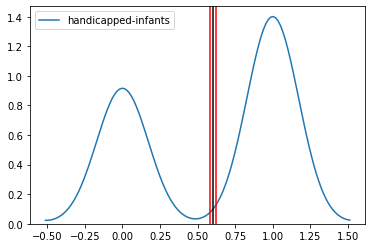

In [0]:
# fake data - one samle of 42 coin flips
handi_infants_dem = df[df['party'] == 'democrat']['handicapped-infants']
handi_infants_dem = handi_infants_dem.dropna()
# kernel density estimate
plot_confidence_interval(handi_infants_dem, confidence=0.5)

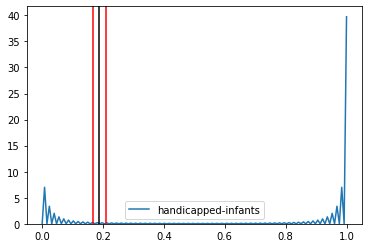

In [0]:
# fake data - one samle of 42 coin flips
handi_infants_rep = df[df['party'] == 'republican']['handicapped-infants']
handi_infants_rep = handi_infants_rep.dropna()
# kernel density estimate
plot_confidence_interval(handi_infants_rep, confidence=0.5)

In [0]:
# I cannot interpret two plots above
# I don't understand so I really need help here

In [0]:
url='https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv'

In [0]:
df = pd.read_csv(url, na_values=" ?")
df.sample(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
23285,59,Self-emp-inc,103948,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,>50K
10125,47,Self-emp-not-inc,182752,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,35,Iran,<=50K
27500,40,Private,262872,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K
9962,47,Private,332727,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K
9122,34,Private,202210,HS-grad,9,Never-married,Other-service,Unmarried,Black,Female,0,0,40,United-States,<=50K
2265,43,Private,159549,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,United-States,>50K
28617,37,Private,393360,Some-college,10,Never-married,Protective-serv,Own-child,Black,Male,0,0,30,United-States,<=50K
13216,54,Private,76344,Bachelors,13,Never-married,Other-service,Not-in-family,White,Female,0,0,50,United-States,<=50K
28764,44,Private,260761,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K


In [0]:
df.shape

(32561, 15)

In [0]:
# just the non-numeric columns (ie, categorical)
df.describe(exclude = 'number')

,workclass,education,marital-status,occupation,relationship,race,sex,country,salary
count,30162,30162,30162,30162,30162,30162,30162,30162,30162
unique,7,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22286,9840,14065,4038,12463,25933,20380,27504,22654


In [0]:
# Remove null values as these will throw off the ttest
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
country            583
salary               0
dtype: int64

In [0]:
df = df.dropna(how='any')

In [0]:
x_table = pd.crosstab(df['sex'], df['relationship'], margins=True)
x_table

relationship,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife,All
sex,,,,,,,
Female,1,3566,386,1961,2463,1405,9782
Male,12462,4160,503,2505,749,1,20380
All,12463,7726,889,4466,3212,1406,30162


In [0]:
x_table.columns

Index([' Husband', ' Not-in-family', ' Other-relative', ' Own-child',
       ' Unmarried', ' Wife', 'All'],
      dtype='object', name='relationship')

In [0]:
# create a set of female counts
f_count = x_table.iloc[0][0:6].values
f_count

array([   1, 3566,  386, 1961, 2463, 1405])

In [0]:
# create a set of male counts
m_count = x_table.iloc[1][0:6].values
m_count

array([12462,  4160,   503,  2505,   749,     1])

In [0]:
row_sums = x_table.iloc[0:2, 6].values
col_sums = x_table.iloc[2, 0:6].values
print(row_sums)
print(col_sums)

[ 9782 20380]
[12463  7726   889  4466  3212  1406]


In [0]:
total = x_table.loc['All', 'All']
total

30162

In [0]:
expected = []
for i in range(len(row_sums)):
  expected_row=[]
  for column in col_sums:
    expected_val = column*row_sums[i]/total
    expected_row.append(expected_val)
  expected.append(expected_row)

expected = np.array(expected)

In [0]:
# what does the expected distribution look like?
print(expected[0])
print(expected[1])

[4041.94237783 2505.66049997  288.31635833 1448.3924143  1041.70094821
  455.98740137]
[8421.05762217 5220.33950003  600.68364167 3017.6075857  2170.29905179
  950.01259863]


In [0]:
# obs
observed = pd.crosstab(df['sex'], df['relationship']).values
observed

array([[    1,  3566,   386,  1961,  2463,  1405],
       [12462,  4160,   503,  2505,   749,     1]])

In [0]:
# Array broadcasting will work with numpy arrays but not python lists
chi_squared_stat = ((observed - expected)**2/(expected)).sum()
chi_squared_stat

12753.734834318759

In [0]:
# can we test that?
from scipy.stats import chisquare 
chisquare(x_table, axis=None)

Power_divergenceResult(statistic=205413.90386910684, pvalue=0.0)

In [0]:
# I get chi squared stat as 12753 from numpy calculations
# but I get 205413 from the scipy chisquare evaluation
# why? are they supposed to be the same or similar at least?

## Personal Question
To be honest, I don't understand how we could use confidence interval from this voting data. In comparison to the coin flips example from the lecture, you can get as many as sample, if you continues to flip the coins, but for the voting data, you already have a full data. 

so my question is, should i take some samples from 435 rows data? 435 data is not so huge so i ws really confused..

## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)